<a href="https://colab.research.google.com/github/Camilojaravila/202210_MINE-4206_ANALISIS_CON_MACHINE_LEARNING/blob/main/Taller%204/Laboratorio%204%20-%20Sesi%C3%B3n%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

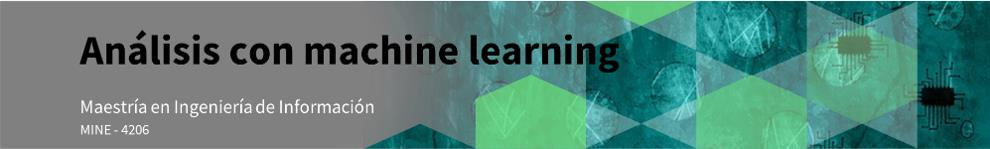

Uno de los esquemas más importantes que han evolucionado gracias a la tecnología es el ambiente financiero. El cual, gracias a las transacciones entre cuentas y compras a través de tarjetas de crédito, han facilitado el flujo de cajra de varios usuarios quienes han dejado de lado el papel moneda para utilizar más los plásticos.

Sin embargo, uno de los peligros que generan estas transacciones son los fraudes, los cuales son causadas por actividades poco normales dentro de las cuentas que generan en pérdidas monetarias para los usuarios. Debido a la gran cantidad de transacciones que se generan por segundo, se les ha pedido que construyan un modelo que les permita identificar los intentos de fraude de manera temprana, para poder realizar las acciones necesarias y no se vean afectado los usuarios.

## Objetivos

*   Resolver un problema de detección de anomalías.
*   Realizar el entrenamiento de una sola clase.
*   Analizar la Arquitectura de los AutoEncoders.



## 0. Importación de Librerías
Para la transformación de los datos, así como para el entrenamiento de los modelos y la visualización de los resultados, se importan las siguientes librerías:

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install markupsafe==2.0.1

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (25.9 MB)
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas_profiling import ProfileReport

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Input
from keras import backend as K
from keras import applications, models

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.8.0


## 1. Perfilamiento y entendimiento de los datos

Primero, leeremos nuestros datos.

In [ ]:
url = 'https://raw.githubusercontent.com/Camilojaravila/202210_MINE-4206_ANALISIS_CON_MACHINE_LEARNING/main/Taller%204/fraudData.csv'
data = pd.read_csv(url)
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-03-04 15:36:59,4476840372112,fraud_Waelchi Inc,kids_pets,96.84,Steven,Walters,M,3206 Hall Divide Suite 282,...,34.6689,-86.2296,3395,"Editor, commissioning",1979-01-21,6bc4cf095daf8df07b11eece8fb5bec8,1362411419,35.279698,-86.019457,0
1,1,2019-10-07 02:06:58,6011724471098086,"fraud_Lockman, West and Runte",grocery_pos,188.62,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,743d85d2d2069d7b2009985f2f1b23f9,1349575618,46.446400,-118.524261,0
2,2,2020-04-06 13:06:01,2720433095629877,"fraud_Walter, Hettinger and Kessler",personal_care,45.47,Mark,Wood,M,854 Walker Dale Suite 488,...,44.0575,-69.9656,3224,"Engineer, electronics",1997-08-22,110b37995a9f71814ce7322c94ef9cee,1365253561,43.861209,-69.449185,0
3,3,2019-10-26 20:45:49,4128730454058057622,fraud_Ratke and Sons,health_fitness,31.95,Monique,Martin,F,68276 Matthew Springs,...,31.3833,-95.0619,43,"Engineer, production",1949-10-04,4e95a70cd3b156f31aff0c54d1b31c5d,1351284349,31.736087,-94.277414,0
4,4,2019-05-31 10:55:33,4922710831011201,fraud_Volkman-Predovic,shopping_net,6.48,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,c391f9bbfee71ab6fbf749d6e5078443,1338461733,40.715543,-79.417185,0


Y utilizaremos nuestro diccionario de datos proporcionado por el Negocio:

* index - Unique Identifier for each row
* transdatetrans_time - Transaction DateTime
* cc_num - Credit Card Number of Customer
* merchant - Merchant Name
* category - Category of Merchant
* amt - Amount of Transaction
* first - First Name of Credit Card Holder
* last - Last Name of Credit Card Holder
* gender - Gender of Credit Card Holder
* street - Street Address of Credit Card Holder
* city - City of Credit Card Holder
* state - State of Credit Card Holder
* zip - Zip of Credit Card Holder
* lat - Latitude Location of Credit Card Holder
* long - Longitude Location of Credit Card Holder
* city_pop - Credit Card Holder's City Population
* job - Job of Credit Card Holder
* dob - Date of Birth of Credit Card Holder
* trans_num - Transaction Number
* unix_time - UNIX Time of transaction
* merch_lat - Latitude Location of Merchant
* merch_long - Longitude Location of Merchant
* is_fraud - Fraud Flag

Obtenemos nuestro reporte gracias a la libreria de PandasProfiling. Para poder observar el comportamiento de los datos

In [ ]:
ProfileReport(data,minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Como vamos a utilizar una metodología de detección de anomalías. Vamos a separar nuestro entrenamiento para que aprenda la clase normal, y así evaluar con las clases fraudulentas.

In [ ]:
#Filtrar la clase normal
normal = data[data['is_fraud']==0]
fraud = data[data['is_fraud']==1]
fraud

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
155,155,2019-08-18 14:05:11,502012776709,"fraud_Streich, Rolfson and Wilderman",kids_pets,2.46,Sherry,Martinez,F,144 Yu Locks Apt. 754,...,42.6315,-75.1866,165,Naval architect,1945-09-20,26385dc426e7db940fdcc8baf82eb21d,1345298711,42.149072,-75.904794,1
168,168,2020-06-08 19:48:27,4334230547694630,fraud_Connelly PLC,food_dining,109.87,Scott,Martin,M,7483 Navarro Flats,...,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,4401c2573668802783d5e2323a16eb16,1370720907,43.766999,-111.557074,1
365,365,2020-06-16 03:41:01,4951647200979051,"fraud_Goldner, Kovacek and Abbott",grocery_pos,366.09,Kimberly,Miller,F,75533 Tamara Valleys,...,37.9943,-88.9417,324,"Scientist, research (physical sciences)",1976-06-15,08ab7a0d04701d6cb28da74c875b848a,1371354061,37.011792,-89.611675,1
488,488,2019-01-31 23:27:34,561942763351,"fraud_Durgan, Gislason and Spencer",home,271.41,Melissa,Brown,F,330 Montoya Ramp,...,38.9087,-77.0414,601723,Prison officer,1986-03-14,d240b62edf13fdac89a26ec6f8b3d06f,1328052454,38.066476,-76.794198,1
512,512,2019-11-11 23:19:48,4826655832045236,fraud_Dooley-Thompson,misc_net,789.20,Tami,Forbes,F,5204 Robinson Plaza Suite 897,...,41.6983,-70.3001,1850,Counselling psychologist,1963-12-29,21947fa618b8bb4160865264dd53e1f6,1352675988,41.664139,-70.355410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296278,296278,2019-03-04 22:05:25,2657850734909997,fraud_Bins-Tillman,entertainment,383.07,Alan,Howard,M,04139 Johnson Prairie Suite 401,...,42.3749,-83.1087,673342,Trading standards officer,1946-11-01,16d9b06a938ff05d3eaccfa38b542d47,1330898725,42.270551,-82.607415,1
296497,296497,2019-10-26 01:29:42,4255397449664185994,fraud_Bernhard Inc,gas_transport,6.61,George,Smith,M,7377 Walton Extensions Apt. 979,...,32.6900,-96.9177,1263321,"Designer, interior/spatial",1952-09-27,cc5406d5fc7a3707b913921e85473b99,1351214982,32.503965,-96.774736,1
296583,296583,2019-12-05 00:22:55,4102003771126577611,fraud_Rau and Sons,grocery_pos,303.92,William,Fitzgerald,M,715 Courtney Pike Suite 932,...,32.9276,-97.2489,95035,Probation officer,1987-06-13,1f0cc8138ca51123d58301b0b57d4576,1354666975,33.683901,-97.318818,1
296586,296586,2019-12-28 03:59:12,676195318214,"fraud_Lind, Huel and McClure",gas_transport,9.94,Brandy,Quinn,F,9734 Beard Fields Suite 885,...,29.6047,-96.5249,106,"Editor, film/video",1983-07-24,7c65e44fe3af8061c8df0f26b519cce2,1356667152,29.372160,-95.896707,1


Dividiremos nuestros datos de entrenamiento y validación.

In [ ]:
train, test = train_test_split(normal, test_size=0.2, random_state=33)
test = pd.concat([test,fraud])
test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
213805,213805,2020-05-05 11:34:56,4355790796238264643,fraud_Howe PLC,entertainment,64.05,Tanner,Davis,M,2632 Stevens Light Apt. 213,...,39.8153,-91.2627,1656,Exhibition designer,1969-08-04,81ecf0c51fca56c313138c7c3f40213f,1367753696,39.854905,-91.665272,0
75719,75719,2019-06-23 19:24:13,6011542681743618,"fraud_Hyatt, Russel and Gleichner",health_fitness,3.47,Emily,Hall,F,8851 Reese Neck,...,38.8089,-78.7776,863,"Engineer, mining",1972-08-09,bd41d7727d6217f0ab9dd48b0c25ebe4,1340479453,38.450748,-79.414559,0
170766,170766,2020-01-29 11:12:16,372520049757633,fraud_O'Keefe-Hudson,grocery_pos,73.46,Lori,Ramirez,F,4293 Ramirez Squares,...,48.6031,-93.2977,136,Ceramics designer,2000-02-20,1800bfa31e637f9eec5f06c20074c5b2,1359457936,48.297391,-92.889309,0
291180,291180,2020-03-01 10:12:32,213180742685905,"fraud_Yost, Block and Koepp",misc_pos,120.58,Kayla,Sutton,F,010 Weaver Land,...,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,beab5ade74b9427c56c242ad44721730,1362132752,39.557943,-123.100798,0
8360,8360,2019-09-23 12:05:12,4452366298769043,fraud_Hermann and Sons,shopping_pos,8.07,Linda,Davis,F,6602 Ortiz Pine Apt. 179,...,32.0758,-96.7010,1563,Financial adviser,1978-03-04,edc435d84af7462671d85304ca6dfae6,1348401912,31.264936,-97.100964,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296278,296278,2019-03-04 22:05:25,2657850734909997,fraud_Bins-Tillman,entertainment,383.07,Alan,Howard,M,04139 Johnson Prairie Suite 401,...,42.3749,-83.1087,673342,Trading standards officer,1946-11-01,16d9b06a938ff05d3eaccfa38b542d47,1330898725,42.270551,-82.607415,1
296497,296497,2019-10-26 01:29:42,4255397449664185994,fraud_Bernhard Inc,gas_transport,6.61,George,Smith,M,7377 Walton Extensions Apt. 979,...,32.6900,-96.9177,1263321,"Designer, interior/spatial",1952-09-27,cc5406d5fc7a3707b913921e85473b99,1351214982,32.503965,-96.774736,1
296583,296583,2019-12-05 00:22:55,4102003771126577611,fraud_Rau and Sons,grocery_pos,303.92,William,Fitzgerald,M,715 Courtney Pike Suite 932,...,32.9276,-97.2489,95035,Probation officer,1987-06-13,1f0cc8138ca51123d58301b0b57d4576,1354666975,33.683901,-97.318818,1
296586,296586,2019-12-28 03:59:12,676195318214,"fraud_Lind, Huel and McClure",gas_transport,9.94,Brandy,Quinn,F,9734 Beard Fields Suite 885,...,29.6047,-96.5249,106,"Editor, film/video",1983-07-24,7c65e44fe3af8061c8df0f26b519cce2,1356667152,29.372160,-95.896707,1


## 2. Preparación de datos

Para poder evaluar nuestro modelo. Primero separaremos nuestro conjunto de características de su variable predictora.

In [ ]:
X_train, y_train = train.drop(['Unnamed: 0','trans_date_trans_time','is_fraud','cc_num','zip','dob','trans_num','unix_time','city','state','street','first','last'], axis=1), train['is_fraud']
display(X_train)
y_train

,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long
79343,fraud_Kuphal-Predovic,misc_net,139.40,F,41.0646,-87.5917,2135,"Psychotherapist, child",41.134513,-86.919600
37375,fraud_Eichmann-Kilback,home,66.87,M,37.7773,-119.0825,633,Health service manager,38.335429,-119.057810
12870,fraud_Koepp-Parker,grocery_pos,69.80,M,43.5835,-70.3457,18760,Make,44.420229,-69.795846
344,fraud_Collier Inc,grocery_net,54.04,F,38.9462,-94.9714,5760,Chief Executive Officer,39.798063,-95.181531
294756,fraud_Altenwerth-Kilback,home,5.18,F,41.1558,-101.1360,1789,Insurance broker,40.630991,-100.147293
...,...,...,...,...,...,...,...,...,...,...
148438,"fraud_Schultz, Simonis and Little",grocery_pos,226.24,F,30.7145,-88.0918,270712,"Surveyor, land/geomatics",31.659324,-88.317909
197831,fraud_Auer-West,shopping_net,28.56,F,36.5220,-87.3490,151785,Pathologist,35.742698,-86.731570
159866,fraud_Reichel Inc,entertainment,78.65,F,41.0109,-81.2977,51,Mechanical engineer,41.074469,-81.063442
225210,fraud_Auer-West,shopping_net,5.27,F,34.5906,-95.3800,1760,Occupational psychologist,34.763850,-96.108859


79343     0
37375     0
12870     0
344       0
294756    0
         ..
148438    0
197831    0
159866    0
225210    0
104788    0
Name: is_fraud, Length: 235952, dtype: int64

Para poder procesar los datos, ya con nuestras columnas seleccionadas, realizaremos un OneHotEncoder

In [ ]:
ct = make_column_transformer(
       (StandardScaler(),
        make_column_selector(dtype_exclude=object)), 
       (OneHotEncoder(handle_unknown='ignore'),
        make_column_selector(dtype_include=object)))

X_train = ct.fit_transform(X_train)
X_train = X_train.toarray()
X_train

array([[ 0.41382927,  0.496531  ,  0.19251763, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00364779, -0.15114866, -2.09579175, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01321706,  0.99281681,  1.44571487, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.06415697,  0.48595077,  0.64987722, ...,  0.        ,
         0.        ,  0.        ],
       [-0.35821263, -0.77900764, -0.37342671, ...,  0.        ,
         0.        ,  0.        ],
       [-0.35729168, -1.35658588, -0.47729544, ...,  0.        ,
         0.        ,  0.        ]])

## 3. Modelamiento

Para el desarrollo del laboratorio se utilizará una arquitectura de Autoencoder estructurada de la siguiente manera:

![Autoencoder](https://github.com/jcestevezc/Machine-Learning-Techniques/blob/master/Laboratorio%206/Autoencoder.png?raw=true)

Los codificadores automáticos o autoencoders se utilizan para el preentrenamiento de otras redes, reducción de la dimensionalidad, aprendizaje de espacios latentes, entre otros.

Los autoencoders, por otro lado, pueden ser entrenados sin supervisión. Su estructura generalmente se caracteriza por: 
1. La cantidad de neuronas ocultas es menor que la cantidad de celdas de entrada.
2. La cantidad de celdas de salida es igual a la cantidad de celdas de entrada.
3. El autoencoder se entrena de manera en que la salida está lo más cerca posible de la entrada, obligando a los autoencoders a generalizar datos y realizar búsqueda de patrones comunes.

In [ ]:
autoencoder = Sequential(name="Autoencoder")

#Capa de Entrada
autoencoder.add(Input(shape=(X_train.shape[1],)))

#Encoder
autoencoder.add(Dense(1000))
autoencoder.add(Dense(500))

#Decoder
autoencoder.add(Dense(1000))
autoencoder.add(Dense(X_train.shape[1]))

In [ ]:
autoencoder.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              1191000   
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 1000)              501000    
                                                                 
 dense_3 (Dense)             (None, 1190)              1191190   
                                                                 
Total params: 3,383,690
Trainable params: 3,383,690
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Y utilizaremos un EarlyStopping para evaluar nuestro modelo, por si no encuentra mejora dentro de los entrenamientos de la Red durante las épocas.

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

Como ven, nuestro input será nuestro conjunto X, y nuestra salida será el mismo conjunto X

In [ ]:
autoencoder.fit(X_train,          
                X_train,
                epochs=50,
                callbacks=[callback]
                )

Epoch 1/50
7374/7374 [==============================] - 252s 34ms/step - loss: 0.0102
Epoch 2/50
7374/7374 [==============================] - 249s 34ms/step - loss: 0.0037
Epoch 3/50
7374/7374 [==============================] - 249s 34ms/step - loss: 0.0026
Epoch 4/50
7374/7374 [==============================] - 249s 34ms/step - loss: 0.0035
Epoch 5/50
7374/7374 [==============================] - 254s 34ms/step - loss: 0.0059
Epoch 6/50
7374/7374 [==============================] - 251s 34ms/step - loss: 0.0021
Epoch 7/50
7374/7374 [==============================] - 252s 34ms/step - loss: 0.0018
Epoch 8/50
7374/7374 [==============================] - 258s 35ms/step - loss: 0.0037
Epoch 9/50
7374/7374 [==============================] - 257s 35ms/step - loss: 0.0294
Epoch 10/50
7374/7374 [==============================] - 253s 34ms/step - loss: 0.0028
Epoch 11/50
7374/7374 [==============================] - 258s 35ms/step - loss: 0.0024
Epoch 12/50
7374/7374 [=============================

### 3.1.2. Predicción

Realizamos la predicción de los datos de entrenamiento, para ver que nuestra red está funcionando correctamente.

In [ ]:
predicted = autoencoder.predict(X_train)
pd.DataFrame(predicted)

,0,1,2,3,4,5,6,7,8,9,...,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189
0,0.390178,0.470445,0.250253,-0.258189,0.491872,0.251458,0.003200,-0.007649,0.014274,0.031364,...,-0.003080,0.001977,-0.006674,0.008516,-0.015428,0.007446,-0.000752,-0.001514,-0.007298,0.000500
1,-0.004597,-0.112060,-2.110769,-0.249241,-0.020019,-2.115935,0.009650,0.007102,-0.030171,-0.003990,...,-0.001581,-0.018594,-0.034832,0.014526,-0.011241,0.003523,-0.003659,-0.028103,0.000340,0.003498
2,0.092085,1.018392,1.482236,-0.275407,1.133923,1.465935,-0.011309,-0.011145,0.032563,0.013793,...,-0.017276,-0.015416,0.003008,-0.018060,0.022577,-0.007094,-0.007663,0.014924,0.015231,-0.010532
3,-0.026713,0.086055,-0.342286,-0.253193,0.204220,-0.340767,0.002850,-0.007475,0.013631,0.011560,...,-0.011708,0.004666,-0.005604,0.026582,-0.012428,-0.008586,-0.002365,0.009471,-0.001212,0.006551
4,-0.307263,0.519773,-0.766155,-0.328485,0.421987,-0.775059,-0.011307,-0.000928,0.025099,-0.017807,...,0.007870,0.004926,0.005420,0.008410,0.024562,0.006901,-0.001319,0.000651,0.015006,0.000141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235947,0.666212,-1.521675,0.116704,0.605829,-1.391596,0.124658,0.018088,-0.008380,0.015948,-0.047189,...,-0.018519,0.007110,-0.030538,0.018644,0.005930,-0.018932,-0.000834,0.021204,0.019399,-0.003338
235948,-0.367783,-0.405556,0.197573,0.243538,-0.510608,0.214434,0.003374,-0.016510,0.005851,0.020107,...,-0.028252,0.001728,-0.037013,0.000372,0.018759,-0.011144,0.003123,0.034461,0.013271,0.007889
235949,0.033922,0.477129,0.667227,-0.322155,0.500205,0.661560,0.005618,-0.011028,0.006870,-0.016208,...,-0.008143,0.012378,0.006633,-0.002033,0.034380,0.013831,-0.010962,0.007220,0.028920,-0.000326
235950,-0.448201,-0.781293,-0.438842,-0.296705,-0.687847,-0.426310,0.013477,-0.006076,0.009783,0.052853,...,-0.038028,0.004570,-0.026492,-0.008508,0.020394,0.006752,0.002629,0.025115,0.035097,0.000147


Y buscamos la distribución de los errores entrenados, para ver el comportamiento de nuestra clase "normal".

In [ ]:
error = tf.keras.losses.mean_squared_error(X_train, predicted).numpy()
error

array([0.00091405, 0.00038793, 0.0003417 , ..., 0.00065757, 0.00078767,
       0.00083414], dtype=float32)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


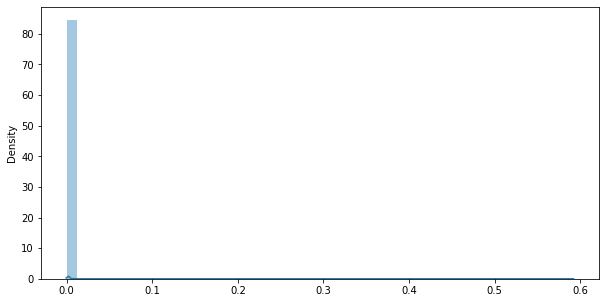

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]

sns.distplot(error)

Y establecemos un valor el cual nos dirá que presenta un "comportamiento extraño". En este caso, será el cuantil 99.4, dado que es la proporción entre fraudes y normales en los datos analizados.

0.001799123985227197


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


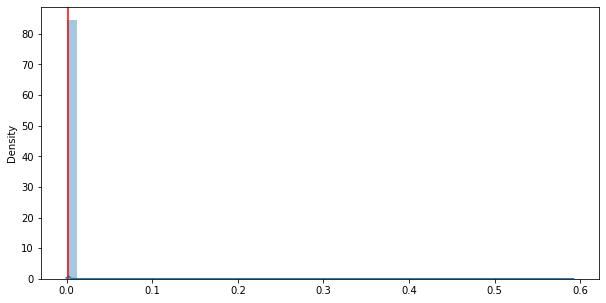

In [ ]:
q = np.quantile(error, (0.994))
print(q)

sns.distplot(error)
plt.axvline(q, 0, 1, color = 'red')
plt.show()

## 4. Validación

Ahora, utilizaremos nuestros datos de evaluación, y evaluar si realmente logra clasificar los fraudes.

In [ ]:
X_test, y_test = test.drop(['Unnamed: 0','trans_date_trans_time','is_fraud','cc_num','zip','dob','trans_num','unix_time','city','state','street','first','last'], axis=1), test['is_fraud']
X_test

,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long
213805,fraud_Howe PLC,entertainment,64.05,M,39.8153,-91.2627,1656,Exhibition designer,39.854905,-91.665272
75719,"fraud_Hyatt, Russel and Gleichner",health_fitness,3.47,F,38.8089,-78.7776,863,"Engineer, mining",38.450748,-79.414559
170766,fraud_O'Keefe-Hudson,grocery_pos,73.46,F,48.6031,-93.2977,136,Ceramics designer,48.297391,-92.889309
291180,"fraud_Yost, Block and Koepp",misc_pos,120.58,F,40.5070,-123.9743,1139,"Therapist, occupational",39.557943,-123.100798
8360,fraud_Hermann and Sons,shopping_pos,8.07,F,32.0758,-96.7010,1563,Financial adviser,31.264936,-97.100964
...,...,...,...,...,...,...,...,...,...,...
296278,fraud_Bins-Tillman,entertainment,383.07,M,42.3749,-83.1087,673342,Trading standards officer,42.270551,-82.607415
296497,fraud_Bernhard Inc,gas_transport,6.61,M,32.6900,-96.9177,1263321,"Designer, interior/spatial",32.503965,-96.774736
296583,fraud_Rau and Sons,grocery_pos,303.92,M,32.9276,-97.2489,95035,Probation officer,33.683901,-97.318818
296586,"fraud_Lind, Huel and McClure",gas_transport,9.94,F,29.6047,-96.5249,106,"Editor, film/video",29.372160,-95.896707


Realizamos la transformación a la matriz con los datos que ya aprendimos previamente.

In [ ]:
X_test = ct.transform(X_test)
X_test = X_test.toarray()
X_test

array([[-0.0198795 ,  0.2503879 , -0.07423913, ...,  0.        ,
         0.        ,  0.        ],
       [-0.36857329,  0.05210213,  0.83300272, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03428374,  1.98180256, -0.22211437, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.36079366, -1.1066599 , -0.50923213, ...,  0.        ,
         0.        ,  0.        ],
       [-0.33133247, -1.76135365, -0.45662197, ...,  0.        ,
         0.        ,  0.        ],
       [ 5.48704189,  1.14513669, -0.97800027, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
predicted = autoencoder.predict(X_test)
pd.DataFrame(predicted)

,0,1,2,3,4,5,6,7,8,9,...,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189
0,-0.099555,0.235535,-0.105737,-0.270538,0.240309,-0.101934,0.012586,0.022216,0.012356,0.001764,...,0.022191,-0.004521,-0.011078,0.016250,-0.024477,0.005322,-0.000401,0.009844,-0.004664,-0.002743
1,-0.173536,0.049473,0.799437,-0.294675,0.045969,0.794071,0.000189,-0.017688,0.014924,0.017425,...,0.008031,-0.011449,-0.002433,0.024222,0.035900,-0.002693,-0.002497,-0.024860,-0.001269,0.003548
2,0.106645,1.983274,-0.211465,-0.288844,1.891702,-0.225408,0.003705,0.022462,0.012722,-0.013447,...,-0.001069,-0.005316,-0.012677,-0.030268,-0.033502,0.000815,-0.000411,0.010974,-0.010618,0.002767
3,0.336387,0.372217,-2.408050,-0.288532,0.203617,-2.401140,0.013427,-0.004614,-0.010335,-0.007991,...,-0.013331,-0.002229,-0.002241,0.000217,-0.004533,0.018075,0.005175,0.018730,-0.035398,0.001881
4,-0.351450,-1.250692,-0.481702,-0.278640,-1.400056,-0.475630,0.009994,0.007157,0.013983,-0.014100,...,-0.018590,0.006210,-0.010364,0.020704,0.009628,-0.021531,0.010050,-0.030168,-0.012616,-0.002836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60718,1.623410,0.747498,0.511401,1.987594,0.743878,0.529111,0.020924,0.014665,-0.025976,-0.002356,...,0.005414,0.004480,-0.038456,-0.000462,-0.009806,-0.004742,0.003435,0.005013,-0.011836,0.003520
60719,-0.354884,-1.152601,-0.504669,3.870452,-1.152528,-0.497919,0.006335,0.010033,-0.003630,0.010826,...,-0.021739,0.010053,-0.002207,-0.023681,-0.019420,-0.012875,-0.002769,0.012699,0.016080,-0.002358
60720,1.088252,-1.116619,-0.519981,0.034362,-0.982023,-0.545708,0.017981,-0.012778,0.023952,0.010264,...,-0.000925,0.007888,0.008349,0.015708,-0.024363,-0.016068,0.002454,-0.028203,-0.035389,0.000351
60721,-0.359481,-1.772098,-0.425857,-0.267409,-1.777611,-0.419098,-0.002677,0.013954,-0.023702,-0.012640,...,0.015063,0.008556,0.023738,-0.010035,-0.007578,0.016918,-0.003983,-0.031156,-0.002237,-0.005521


Obtenemos los nuevos errores de este nuevo conjunto de datos.

In [ ]:
error_test = tf.keras.losses.mean_squared_error(X_test, predicted).numpy()
error_test

array([0.00071417, 0.00076811, 0.00030573, ..., 0.00034217, 0.00085107,
       0.00143915], dtype=float32)

Y vemos el comportamiento utilizando el mismo "punto de corte" que el que establecimos anteriormente.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


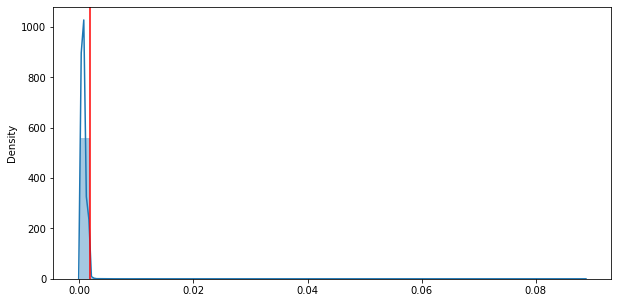

In [ ]:
sns.distplot(error_test)
plt.axvline(q, 0, 1, color = 'red')
plt.show()

Y ahora realizamos la evaluación.

In [ ]:
y_pred = (error_test > q).astype(int)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("----- Classification Report for outliers -----")
print(classification_report(y_test,y_pred))

----- Classification Report for outliers -----
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     58989
           1       0.39      0.14      0.21      1734

    accuracy                           0.97     60723
   macro avg       0.68      0.57      0.59     60723
weighted avg       0.96      0.97      0.96     60723



¿Y que pasa si movemos nuestro umbral?

0.0017548741935752331


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


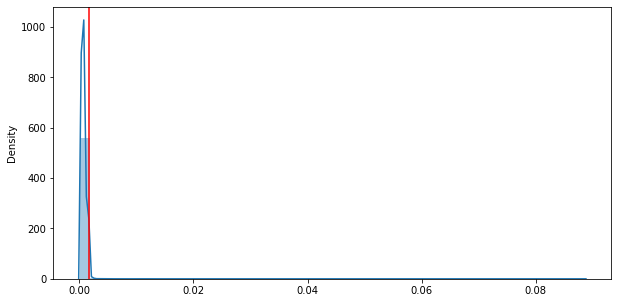

In [ ]:
q = np.quantile(error, (0.99))
print(q)
sns.distplot(error_test, norm_hist=True)
plt.axvline(q, 0, 1, color = 'red')
plt.show()

In [ ]:
y_pred = (error_test > q).astype(int)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("----- Classification Report for outliers -----")
print(classification_report(y_test,y_pred))

----- Classification Report for outliers -----
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     58989
           1       0.30      0.16      0.21      1734

    accuracy                           0.97     60723
   macro avg       0.64      0.57      0.59     60723
weighted avg       0.96      0.97      0.96     60723

